Ideal student-teacher ratio across Texas districts

In [68]:
## Project 4
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [69]:
district_20_21 = pd.read_csv('Resources/DISTRICTS_INFO_2020:21.csv')

district_20_21.head()

,DISTRICT NAME,DISTRICT NUMBER,COUNTY NUMBER AND NAME,EDUCATION SERVICE CENTER REGION,DISTRICT ACCOUNTABILITY RATINGS,TOTAL NUMBER OF SCHOOLS,TOTAL STUDENTS,STUDENTS: % AFRICAN AMERICAN,STUDENTS: % HISPANIC,STUDENTS: % WHITE,...,EXPENDITURE: % CAREER & TECHNICAL EDUCATION,EXPENDITURE: % GIFTED & TALENTED EDUCATION,EXPENDITURE: % ATHLETICS/RELATED ACTIVITIES,EXPENDITURE: % HIGH SCHOOL ALLOTMENT,EXPENDITURE: % PREKINDERGARTEN,EXPENDITURE: % UN-ALLOCATED,DISTRICT SIZE,COMMUNITY TYPE,PROPERTY WEALTH,TAX RATE
0,CAYUGA ISD,1902,001 ANDERSON,7,A,3,574,4.4,11.5,79.1,...,3.3,0.0,3.7,0.0,0.0,24.1,500 to 999,Rural,"$539,089 to < $573,876",Under $1.0809
1,ELKHART ISD,1903,001 ANDERSON,7,A,4,1150,4.0,11.8,80.3,...,6.9,0.0,3.8,0.0,0.0,26.8,"1,000 to 1,599",Non-metropolitan Stable,"$234,712 to < $298,152",$1.2148 to under $1.3239
2,FRANKSTON ISD,1904,001 ANDERSON,7,A,3,808,8.5,11.3,75.2,...,5.3,0.1,6.7,0.0,0.2,28.6,500 to 999,Rural,"$359,962 to < $411,857",$1.3239 and over
3,NECHES ISD,1906,001 ANDERSON,7,A,2,342,8.2,13.5,75.1,...,4.5,0.0,0.0,0.0,0.7,34.1,Under 500,Rural,"$298,152 to < $340,843",$1.3239 and over
4,PALESTINE ISD,1907,001 ANDERSON,7,B,6,3360,25.1,42.9,27.3,...,4.2,0.1,3.5,0.7,0.9,30.7,"3,000 to 4,999",Independent Town,"$298,152 to < $340,843",$1.3239 and over


In [70]:
demographic20_21 = pd.read_csv('Resources/demographic20_21.csv')

demographic20_21.head()

,DISTRICT NAME,TOTAL NUMBER OF SCHOOLS,TOTAL STUDENTS,STUDENTS: % AFRICAN AMERICAN,STUDENTS: % HISPANIC,STUDENTS: % WHITE,STUDENTS: % AMERICAN INDIAN,STUDENTS: % ASIAN,STUDENTS: % PACIFIC ISLANDER,STUDENTS: % TWO OR MORE RACES,STUDENTS: % ECONOMICALLY DISADVANTAGED,STUDENTS: % ENGLISH LEARNERS (EL),STUDENTS: % SPECIAL EDUCATION,STUDENTS: % BILINGUAL/ESL EDUCATION,STUDENTS: % CAREER & TECHNICAL EDUCATION,STUDENTS: % GIFTED & TALENTED EDUCATION
0,CAYUGA ISD,3,574,4.4,11.5,79.1,0.0,0.5,0.0,4.5,40.8,1.0,14.6,1.0,30.5,6.1
1,ELKHART ISD,4,1150,4.0,11.8,80.3,0.3,0.2,0.0,3.4,45.4,2.8,12.1,2.7,31.8,4.6
2,FRANKSTON ISD,3,808,8.5,11.3,75.2,0.4,1.0,0.0,3.6,54.2,4.1,13.1,4.1,43.9,7.3
3,NECHES ISD,2,342,8.2,13.5,75.1,0.3,0.3,0.0,2.6,54.1,2.0,10.5,2.0,29.5,5.6
4,PALESTINE ISD,6,3360,25.1,42.9,27.3,0.2,0.7,0.1,3.7,81.6,17.7,13.5,16.1,30.6,2.3


In [71]:
staar20_21 = pd.read_csv('Resources/staar20_21.csv')
staar20_21.head()

,DISTRICT NAME,TOTAL NUMBER OF SCHOOLS,TOTAL STUDENTS,STAAR: % ALL SUBJECTS AT APPROACHES GRADE LEVEL STANDARD OR ABOVE,STAAR: % ALL SUBJECTS AT MEETS GRADE LEVEL STANDARD OR ABOVE,STAAR: % ALL SUBJECTS AT MASTERS GRADE LEVEL STANDARD,STAAR: % ELA/READING AT APPROACHES GRADE LEVEL STANDARD OR ABOVE,STAAR: % ELA/READING AT MEETS GRADE LEVEL STANDARD OR ABOVE,STAAR: % ELA/READING AT MASTERS GRADE LEVEL STANDARD,STAAR: % SCIENCE AT APPROACHES GRADE LEVEL STANDARD OR ABOVE,...,STAAR: % ASIAN AT MASTERS GRADE LEVEL STANDARD,STAAR: % PACIFIC ISLANDER AT APPROACHES GRADE LEVEL STANDARD OR ABOVE,STAAR: % PACIFIC ISLANDER AT MEETS GRADE LEVEL STANDARD OR ABOVE,STAAR: % PACIFIC ISLANDER AT MASTERS GRADE LEVEL STANDARD,STAAR: % TWO OR MORE RACES AT APPROACHES GRADE LEVEL STANDARD OR ABOVE,STAAR: % TWO OR MORE RACES AT MEETS GRADE LEVEL STANDARD OR ABOVE,STAAR: % TWO OR MORE RACES AT MASTERS GRADE LEVEL STANDARD,STAAR: % ECONOMICALLY DISADVANTAGED AT APPROACHES GRADE LEVEL STANDARD OR ABOVE,STAAR: % ECONOMICALLY DISADVANTAGED AT MEETS GRADE LEVEL STANDARD OR ABOVE,STAAR: % ECONOMICALLY DISADVANTAGED AT MASTERS GRADE LEVEL STANDARD
0,CAYUGA ISD,3,574,84.0,62.0,33.0,81.0,67.0,39.0,85.0,...,17.0,NaN,NaN,NaN,83.0,54.0,34.0,76.0,50.0,23.0
1,ELKHART ISD,4,1150,85.0,59.0,30.0,85.0,64.0,34.0,86.0,...,-1.0,NaN,NaN,NaN,77.0,46.0,23.0,77.0,42.0,19.0
2,FRANKSTON ISD,3,808,83.0,57.0,25.0,84.0,63.0,24.0,81.0,...,16.0,NaN,NaN,NaN,75.0,58.0,28.0,77.0,49.0,17.0
3,NECHES ISD,2,342,90.0,64.0,27.0,87.0,67.0,30.0,90.0,...,-1.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,86.0,53.0,17.0
4,PALESTINE ISD,6,3360,74.0,46.0,20.0,72.0,48.0,20.0,78.0,...,44.0,-1.0,-1.0,-1.0,74.0,44.0,18.0,70.0,40.0,16.0


Project Overview
* Goal: Develop a predictive model for the ideal student-teacher ratio.
* Data: District-wise information from Texas.
* Metrics: To evaluate our model, we'll consider accuracy measures like MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and R² (Coefficient of Determination).

In [72]:
teachers20_21 = pd.read_csv('Resources/teachers20:21.csv')
teachers20_21.head(10)

,DISTRICT NAME,TOTAL NUMBER OF SCHOOLS,TOTAL STUDENTS,TOTAL STAFF FTE,TOTAL TEACHER FTE,STAFF: % TEACHERS,STAFF: % EDUCATIONAL AIDES,STAFF: % AUXILIARY,AVERAGE SALARY: TEACHER,NUMBER OF STUDENTS PER TOTAL STAFF,...,TEACHER: % AMERICAN INDIAN,TEACHER: % ASIAN,TEACHER: % PACIFIC ISLANDER,TEACHER: % TWO OR MORE RACES,TEACHER: % REGULAR EDUCATION,TEACHER: % SPECIAL EDUCATION,TEACHER: % COMPENSATORY EDUCATION,TEACHER: % BILINGUAL/ESL EDUCATION,TEACHER: % CAREER & TECHNICAL EDUCATION,TEACHER: % OTHER EDUCATION (INCLUDES G & T)
0,CAYUGA ISD,3,574,99.9,46.7,46.8,14.8,26.5,55570.0,5.7,...,0.0,0.0,0.0,0.0,81.6,9.9,0.0,0.0,8.5,0.0
1,ELKHART ISD,4,1150,186.6,104.9,56.2,16.2,19.5,47916.0,6.2,...,0.0,0.0,0.0,0.0,71.5,8.4,4.9,0.7,13.0,1.5
2,FRANKSTON ISD,3,808,146.7,74.5,50.8,15.0,27.4,50382.0,5.5,...,0.0,0.0,0.0,1.3,87.6,7.5,2.7,0.0,2.2,0.0
3,NECHES ISD,2,342,60.1,30.2,50.3,13.7,26.2,55346.0,5.7,...,0.0,0.0,0.0,0.0,70.0,5.5,12.0,0.0,10.8,1.7
4,PALESTINE ISD,6,3360,553.4,260.3,47.0,19.7,19.5,48825.0,6.1,...,0.0,0.0,0.0,1.9,71.4,10.2,5.0,2.6,9.0,1.8
5,WESTWOOD ISD,4,1332,265.1,120.6,45.5,19.2,25.2,44741.0,5.0,...,0.8,0.0,0.0,0.0,71.4,6.4,6.1,0.0,10.8,5.3
6,SLOCUM ISD,2,361,68.8,39.0,56.7,9.8,23.0,53637.0,5.2,...,0.0,0.0,0.0,0.0,61.0,5.8,19.2,0.0,10.5,3.4
7,ANDREWS ISD,6,4131,566.4,287.9,50.8,15.4,23.9,62805.0,7.3,...,0.3,0.7,0.0,2.8,41.7,14.4,6.5,9.0,6.0,22.4
8,PINEYWOODS COMMUNITY ACADEMY,4,995,134.3,67.2,50.0,11.1,21.4,53037.0,7.4,...,0.0,0.0,0.0,0.0,82.7,6.8,7.4,0.0,3.1,0.0
9,HUDSON ISD,5,2799,427.8,212.5,49.7,8.2,31.3,54054.0,6.5,...,0.0,0.0,0.0,0.0,66.4,9.6,9.2,0.7,7.4,6.7


In [73]:
# Check for missing values
print(teachers20_21.isnull().sum())

DISTRICT NAME                                     0
TOTAL NUMBER OF SCHOOLS                           0
TOTAL STUDENTS                                    0
TOTAL STAFF FTE                                   3
TOTAL TEACHER FTE                                 3
STAFF: % TEACHERS                                 3
STAFF: % EDUCATIONAL AIDES                        3
STAFF: % AUXILIARY                                3
AVERAGE SALARY: TEACHER                           4
NUMBER OF STUDENTS PER TOTAL STAFF                3
NUMBER OF STUDENTS PER TEACHER                    3
TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE    3
TEACHER: AVERAGE YEARS OF EXPERIENCE              3
TEACHER: % WITH ADVANCED DEGREES                  3
TEACHER: % AFRICAN AMERICAN                       3
TEACHER: % HISPANIC                               3
TEACHER: % WHITE                                  3
TEACHER: % AMERICAN INDIAN                        3
TEACHER: % ASIAN                                  3
TEACHER: % P

In [74]:
teachers20_21.dropna()

,DISTRICT NAME,TOTAL NUMBER OF SCHOOLS,TOTAL STUDENTS,TOTAL STAFF FTE,TOTAL TEACHER FTE,STAFF: % TEACHERS,STAFF: % EDUCATIONAL AIDES,STAFF: % AUXILIARY,AVERAGE SALARY: TEACHER,NUMBER OF STUDENTS PER TOTAL STAFF,...,TEACHER: % AMERICAN INDIAN,TEACHER: % ASIAN,TEACHER: % PACIFIC ISLANDER,TEACHER: % TWO OR MORE RACES,TEACHER: % REGULAR EDUCATION,TEACHER: % SPECIAL EDUCATION,TEACHER: % COMPENSATORY EDUCATION,TEACHER: % BILINGUAL/ESL EDUCATION,TEACHER: % CAREER & TECHNICAL EDUCATION,TEACHER: % OTHER EDUCATION (INCLUDES G & T)
0,CAYUGA ISD,3,574,99.9,46.7,46.8,14.8,26.5,55570.0,5.7,...,0.0,0.0,0.0,0.0,81.6,9.9,0.0,0.0,8.5,0.0
1,ELKHART ISD,4,1150,186.6,104.9,56.2,16.2,19.5,47916.0,6.2,...,0.0,0.0,0.0,0.0,71.5,8.4,4.9,0.7,13.0,1.5
2,FRANKSTON ISD,3,808,146.7,74.5,50.8,15.0,27.4,50382.0,5.5,...,0.0,0.0,0.0,1.3,87.6,7.5,2.7,0.0,2.2,0.0
3,NECHES ISD,2,342,60.1,30.2,50.3,13.7,26.2,55346.0,5.7,...,0.0,0.0,0.0,0.0,70.0,5.5,12.0,0.0,10.8,1.7
4,PALESTINE ISD,6,3360,553.4,260.3,47.0,19.7,19.5,48825.0,6.1,...,0.0,0.0,0.0,1.9,71.4,10.2,5.0,2.6,9.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NEWCASTLE ISD,1,212,42.3,24.1,57.0,18.9,18.9,55736.0,5.0,...,0.0,0.0,0.0,0.0,73.4,8.5,3.3,0.0,14.7,0.0
1203,OLNEY ISD,3,696,138.1,76.8,55.6,10.8,23.2,48632.0,5.0,...,0.0,0.0,0.0,1.3,79.9,4.1,5.9,1.3,7.8,1.0
1204,ZAPATA COUNTY ISD,6,3284,522.2,228.9,43.8,12.0,30.4,54608.0,6.3,...,0.0,0.0,0.0,0.4,76.7,8.4,0.1,4.3,6.7,3.8
1205,CRYSTAL CITY ISD,5,1779,306.3,111.7,36.5,16.7,35.1,50929.0,5.8,...,0.0,0.0,0.0,0.9,85.1,5.8,0.2,1.2,4.5,3.2


In [75]:
teachers20_21.columns

Index(['DISTRICT NAME', 'TOTAL NUMBER OF SCHOOLS', 'TOTAL STUDENTS',
       'TOTAL STAFF FTE', 'TOTAL TEACHER FTE', 'STAFF: % TEACHERS',
       'STAFF: % EDUCATIONAL AIDES', 'STAFF: % AUXILIARY',
       'AVERAGE SALARY: TEACHER', 'NUMBER OF STUDENTS PER TOTAL STAFF',
       'NUMBER OF STUDENTS PER TEACHER',
       'TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE',
       'TEACHER: AVERAGE YEARS OF EXPERIENCE',
       'TEACHER: % WITH ADVANCED DEGREES', 'TEACHER: % AFRICAN AMERICAN',
       'TEACHER: % HISPANIC', 'TEACHER: % WHITE', 'TEACHER: % AMERICAN INDIAN',
       'TEACHER: % ASIAN', 'TEACHER: % PACIFIC ISLANDER',
       'TEACHER: % TWO OR MORE RACES', 'TEACHER: % REGULAR EDUCATION',
       'TEACHER: % SPECIAL EDUCATION', 'TEACHER: % COMPENSATORY EDUCATION',
       'TEACHER: % BILINGUAL/ESL EDUCATION',
       'TEACHER: % CAREER & TECHNICAL EDUCATION',
       'TEACHER: % OTHER EDUCATION (INCLUDES G & T)'],
      dtype='object')

Idea> 1. Proportion of Teachers with Advanced Degrees
A higher percentage of teachers with advanced degrees might correlate with a different optimal student-teacher ratio, potentially reflecting on the quality of education.

Idea> 2. Experience Level
The average years of experience among teachers and the percentage of teachers with 5 or fewer years of experience could be crucial. These could affect the ideal ratio, as more experienced teachers might manage larger classes more effectively.

Idea> 3. 3. Teacher Diversity
Diversity in the teaching staff, represented by the percentage of teachers from various racial backgrounds, could be an important factor, possibly affecting student engagement and the learning environment.

Idea> 4. Specialization in Education
The percentage of teachers in specialized roles (Special Education, Bilingual/ESL Education, etc.) might influence the ideal student-teacher ratio, as these roles often require more individualized attention to students.

Idea> 5. 5. Financial Aspects
The average salary of a teacher could be a proxy for district investment in education, which might relate to the optimal student-teacher ratio.

In [76]:

# Creating column current student/teacher ratio
if 'TOTAL STUDENTS' in teachers20_21.columns and 'TOTAL TEACHER FTE' in teachers20_21.columns:
    # Calculate the current student-teacher ratio
    teachers20_21['current_student_teacher_ratio'] = teachers20_21['TOTAL STUDENTS'] / teachers20_21['TOTAL TEACHER FTE']
    print("The 'current_student_teacher_ratio' feature has been successfully added to the dataset.")
else:
    print("Error: Required columns ('TOTAL STUDENTS' and/or 'TOTAL TEACHER FTE') are missing from the dataset.")

# Display the first few rows to verify the new column
print(teachers20_21[['TOTAL STUDENTS', 'TOTAL TEACHER FTE', 'current_student_teacher_ratio']].head())


The 'current_student_teacher_ratio' feature has been successfully added to the dataset.
   TOTAL STUDENTS  TOTAL TEACHER FTE  current_student_teacher_ratio
0             574               46.7                      12.291221
1            1150              104.9                      10.962822
2             808               74.5                      10.845638
3             342               30.2                      11.324503
4            3360              260.3                      12.908183


In [77]:
teachers20_21.columns

Index(['DISTRICT NAME', 'TOTAL NUMBER OF SCHOOLS', 'TOTAL STUDENTS',
       'TOTAL STAFF FTE', 'TOTAL TEACHER FTE', 'STAFF: % TEACHERS',
       'STAFF: % EDUCATIONAL AIDES', 'STAFF: % AUXILIARY',
       'AVERAGE SALARY: TEACHER', 'NUMBER OF STUDENTS PER TOTAL STAFF',
       'NUMBER OF STUDENTS PER TEACHER',
       'TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE',
       'TEACHER: AVERAGE YEARS OF EXPERIENCE',
       'TEACHER: % WITH ADVANCED DEGREES', 'TEACHER: % AFRICAN AMERICAN',
       'TEACHER: % HISPANIC', 'TEACHER: % WHITE', 'TEACHER: % AMERICAN INDIAN',
       'TEACHER: % ASIAN', 'TEACHER: % PACIFIC ISLANDER',
       'TEACHER: % TWO OR MORE RACES', 'TEACHER: % REGULAR EDUCATION',
       'TEACHER: % SPECIAL EDUCATION', 'TEACHER: % COMPENSATORY EDUCATION',
       'TEACHER: % BILINGUAL/ESL EDUCATION',
       'TEACHER: % CAREER & TECHNICAL EDUCATION',
       'TEACHER: % OTHER EDUCATION (INCLUDES G & T)',
       'current_student_teacher_ratio'],
      dtype='object')

In [78]:
teachers20_21.head()

,DISTRICT NAME,TOTAL NUMBER OF SCHOOLS,TOTAL STUDENTS,TOTAL STAFF FTE,TOTAL TEACHER FTE,STAFF: % TEACHERS,STAFF: % EDUCATIONAL AIDES,STAFF: % AUXILIARY,AVERAGE SALARY: TEACHER,NUMBER OF STUDENTS PER TOTAL STAFF,...,TEACHER: % ASIAN,TEACHER: % PACIFIC ISLANDER,TEACHER: % TWO OR MORE RACES,TEACHER: % REGULAR EDUCATION,TEACHER: % SPECIAL EDUCATION,TEACHER: % COMPENSATORY EDUCATION,TEACHER: % BILINGUAL/ESL EDUCATION,TEACHER: % CAREER & TECHNICAL EDUCATION,TEACHER: % OTHER EDUCATION (INCLUDES G & T),current_student_teacher_ratio
0,CAYUGA ISD,3,574,99.9,46.7,46.8,14.8,26.5,55570.0,5.7,...,0.0,0.0,0.0,81.6,9.9,0.0,0.0,8.5,0.0,12.291221
1,ELKHART ISD,4,1150,186.6,104.9,56.2,16.2,19.5,47916.0,6.2,...,0.0,0.0,0.0,71.5,8.4,4.9,0.7,13.0,1.5,10.962822
2,FRANKSTON ISD,3,808,146.7,74.5,50.8,15.0,27.4,50382.0,5.5,...,0.0,0.0,1.3,87.6,7.5,2.7,0.0,2.2,0.0,10.845638
3,NECHES ISD,2,342,60.1,30.2,50.3,13.7,26.2,55346.0,5.7,...,0.0,0.0,0.0,70.0,5.5,12.0,0.0,10.8,1.7,11.324503
4,PALESTINE ISD,6,3360,553.4,260.3,47.0,19.7,19.5,48825.0,6.1,...,0.0,0.0,1.9,71.4,10.2,5.0,2.6,9.0,1.8,12.908183


For starters, we'll explore a few regression models to see which performs best on the dataset:

Linear Regression: A good baseline that's easy to interpret.
Random Forest Regressor: A powerful model that can capture complex nonlinear relationships.
Gradient Boosting Regressor: Another robust model known for its predictive accuracy.

X = 'TOTAL NUMBER OF SCHOOLS': More schools could indicate a larger district with potentially different staffing needs.

'TOTAL STUDENTS': Directly impacts the student-teacher ratio.

'TOTAL TEACHER FTE': Essential for calculating the student-teacher ratio.

'STAFF: % TEACHERS', 'STAFF: % EDUCATIONAL AIDES', and 'STAFF: % AUXILIARY': These percentages provide insight into the composition of the staff, which could affect the ideal ratio.

'AVERAGE SALARY: TEACHER': Higher salaries might attract more qualified or experienced teachers, potentially affecting the ideal ratio.

'TEACHER: % WITH ADVANCED DEGREES' and 'TEACHER: AVERAGE YEARS OF EXPERIENCE': Qualifications and experience of teachers could influence the optimal student-teacher ratio.

'TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE': This might indicate a younger, less experienced workforce, possibly affecting the ideal ratio differently.

Demographic percentages ('TEACHER: % AFRICAN AMERICAN', 'TEACHER: % HISPANIC', etc.): While not directly affecting the student-teacher ratio, these features might be relevant in broader analyses related to diversity and educational equity.


In [82]:


# Check if any division might lead to infinity
teachers20_21['current_student_teacher_ratio'] = teachers20_21['TOTAL STUDENTS'] / teachers20_21['TOTAL TEACHER FTE'].replace(0, np.nan)

# For 'normalized_teacher_salary', ensure the normalization process didn't introduce any infinity
# Assuming 'normalized_teacher_salary' is already in your DataFrame, no division by zero should occur in normalization
# However, let's ensure no infinite values are present
teachers20_21.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now, handle NaN values (which might include what were infinities)
teachers20_21.dropna(subset=['current_student_teacher_ratio'], inplace=True)


In [91]:
# Selecting the columns for X
feature_columns = [
    'TOTAL NUMBER OF SCHOOLS',
    'STAFF: % TEACHERS', 'STAFF: % EDUCATIONAL AIDES', 'STAFF: % AUXILIARY',
    'AVERAGE SALARY: TEACHER', 'TEACHER: % WITH ADVANCED DEGREES', 'TEACHER: AVERAGE YEARS OF EXPERIENCE',
    'TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE', 'TEACHER: % AFRICAN AMERICAN',
    'TEACHER: % HISPANIC', 'TEACHER: % WHITE', 'TEACHER: % AMERICAN INDIAN',
    'TEACHER: % ASIAN', 'TEACHER: % PACIFIC ISLANDER', 'TEACHER: % TWO OR MORE RACES',
    'TEACHER: % REGULAR EDUCATION', 'TEACHER: % SPECIAL EDUCATION', 'TEACHER: % COMPENSATORY EDUCATION',
    'TEACHER: % BILINGUAL/ESL EDUCATION', 'TEACHER: % CAREER & TECHNICAL EDUCATION',
    'TEACHER: % OTHER EDUCATION (INCLUDES G & T)'
]

# Ensure all selected feature columns are present in the data
missing_columns = [col for col in feature_columns if col not in teachers20_21.columns]
if missing_columns:
    print(f"Warning: The following columns are missing from the dataset: {missing_columns}")
else:
    X = teachers20_21[feature_columns]

# Handling missing values in X
from sklearn.impute import SimpleImputer

# Creating an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verifying no more missing values
print(X_imputed.isnull().sum())


TOTAL NUMBER OF SCHOOLS                           0
STAFF: % TEACHERS                                 0
STAFF: % EDUCATIONAL AIDES                        0
STAFF: % AUXILIARY                                0
AVERAGE SALARY: TEACHER                           0
TEACHER: % WITH ADVANCED DEGREES                  0
TEACHER: AVERAGE YEARS OF EXPERIENCE              0
TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE    0
TEACHER: % AFRICAN AMERICAN                       0
TEACHER: % HISPANIC                               0
TEACHER: % WHITE                                  0
TEACHER: % AMERICAN INDIAN                        0
TEACHER: % ASIAN                                  0
TEACHER: % PACIFIC ISLANDER                       0
TEACHER: % TWO OR MORE RACES                      0
TEACHER: % REGULAR EDUCATION                      0
TEACHER: % SPECIAL EDUCATION                      0
TEACHER: % COMPENSATORY EDUCATION                 0
TEACHER: % BILINGUAL/ESL EDUCATION                0
TEACHER: % C

In [92]:
teachers20_21

,DISTRICT NAME,TOTAL NUMBER OF SCHOOLS,TOTAL STUDENTS,TOTAL STAFF FTE,TOTAL TEACHER FTE,STAFF: % TEACHERS,STAFF: % EDUCATIONAL AIDES,STAFF: % AUXILIARY,AVERAGE SALARY: TEACHER,NUMBER OF STUDENTS PER TOTAL STAFF,...,TEACHER: % ASIAN,TEACHER: % PACIFIC ISLANDER,TEACHER: % TWO OR MORE RACES,TEACHER: % REGULAR EDUCATION,TEACHER: % SPECIAL EDUCATION,TEACHER: % COMPENSATORY EDUCATION,TEACHER: % BILINGUAL/ESL EDUCATION,TEACHER: % CAREER & TECHNICAL EDUCATION,TEACHER: % OTHER EDUCATION (INCLUDES G & T),current_student_teacher_ratio
0,CAYUGA ISD,3,574,99.9,46.7,46.8,14.8,26.5,55570.0,5.7,...,0.0,0.0,0.0,81.6,9.9,0.0,0.0,8.5,0.0,12.291221
1,ELKHART ISD,4,1150,186.6,104.9,56.2,16.2,19.5,47916.0,6.2,...,0.0,0.0,0.0,71.5,8.4,4.9,0.7,13.0,1.5,10.962822
2,FRANKSTON ISD,3,808,146.7,74.5,50.8,15.0,27.4,50382.0,5.5,...,0.0,0.0,1.3,87.6,7.5,2.7,0.0,2.2,0.0,10.845638
3,NECHES ISD,2,342,60.1,30.2,50.3,13.7,26.2,55346.0,5.7,...,0.0,0.0,0.0,70.0,5.5,12.0,0.0,10.8,1.7,11.324503
4,PALESTINE ISD,6,3360,553.4,260.3,47.0,19.7,19.5,48825.0,6.1,...,0.0,0.0,1.9,71.4,10.2,5.0,2.6,9.0,1.8,12.908183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NEWCASTLE ISD,1,212,42.3,24.1,57.0,18.9,18.9,55736.0,5.0,...,0.0,0.0,0.0,73.4,8.5,3.3,0.0,14.7,0.0,8.796680
1203,OLNEY ISD,3,696,138.1,76.8,55.6,10.8,23.2,48632.0,5.0,...,0.0,0.0,1.3,79.9,4.1,5.9,1.3,7.8,1.0,9.062500
1204,ZAPATA COUNTY ISD,6,3284,522.2,228.9,43.8,12.0,30.4,54608.0,6.3,...,0.0,0.0,0.4,76.7,8.4,0.1,4.3,6.7,3.8,14.346876
1205,CRYSTAL CITY ISD,5,1779,306.3,111.7,36.5,16.7,35.1,50929.0,5.8,...,0.0,0.0,0.9,85.1,5.8,0.2,1.2,4.5,3.2,15.926589


In [93]:
#Preparing model training 
X = teachers20_21[feature_columns]


In [94]:
y = teachers20_21['current_student_teacher_ratio']

Why current_student_teacher_ratio is a suitable target variable:

Educational Significance: It's a critical metric that affects both teaching quality and student learning outcomes. Lower ratios are often associated with more individualized attention to students, potentially leading to better educational outcomes.

Policy and Planning: Insights from predicting this ratio can inform educational policy, school staffing, and resource allocation decisions.

Measurable and Quantifiable: It's a straightforward, quantifiable measure that can be directly observed and calculated from available data, making it an excellent candidate for regression analysis.

In [95]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We'll start with a Linear Regression model, a good baseline for regression tasks. This choice allows us to establish a performance benchmark for potentially more complex models later.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)


In [97]:
# Calculate the model's performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")


R² score: -0.2063
Mean Absolute Error (MAE): 2.4951
Root Mean Square Error (RMSE): 4.0913


With the current_student_teacher_ratio removed from your features X, and now observing the results—R² score of -0.2063, MAE of 2.4951, and RMSE of 4.0913—it appears the model is not performing well. An R² score below 0 indicates that the model is worse than a simple mean-based model, and positive values for MAE and RMSE indicate there's a noticeable average error between the predicted and actual values

Trying a More Complex Model
Let's try using a RandomForestRegressor, which is more robust and can handle non-linear relationships better than linear regression

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate the model's performance metrics
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest R² score: {r2_rf:.4f}")
print(f"Random Forest Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Random Forest Root Mean Square Error (RMSE): {rmse_rf:.4f}")


Random Forest R² score: -1.0080
Random Forest Mean Absolute Error (MAE): 2.0519
Random Forest Root Mean Square Error (RMSE): 5.2786


R² score significantly below 0, and high values for both MAE and RMSE—suggests that the model is still not performing adequately. An R² score less than 0, in particular, indicates that the model does worse than a simple, naive model that would predict the mean value for all observations

The default settings for RandomForestRegressor might not be optimal for your dataset. Consider tuning hyperparameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf. GridSearchCV or RandomizedSearchCV from sklearn can automate this search for you.

In [99]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score (RMSE)
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best RMSE: 5.218012801513812


In [101]:
# Select only numeric columns for correlation analysis
numeric_data = teachers20_21.select_dtypes(include=['number'])

# Now, calculate the correlation matrix on this numeric subset
correlation_matrix = numeric_data.corr()

# Extract and sort the correlations with 'current_student_teacher_ratio'
correlation_with_target = correlation_matrix['current_student_teacher_ratio'].sort_values(ascending=False)

print("Correlation with 'current_student_teacher_ratio':")
print(correlation_with_target)



Correlation with 'current_student_teacher_ratio':
current_student_teacher_ratio                     1.000000
NUMBER OF STUDENTS PER TOTAL STAFF                0.827062
NUMBER OF STUDENTS PER TEACHER                    0.369427
TEACHER: % OTHER EDUCATION (INCLUDES G & T)       0.276473
TEACHER: % WITH ADVANCED DEGREES                  0.244428
AVERAGE SALARY: TEACHER                           0.198397
TOTAL STUDENTS                                    0.150392
TEACHER: % BILINGUAL/ESL EDUCATION                0.135184
TOTAL NUMBER OF SCHOOLS                           0.133298
TOTAL STAFF FTE                                   0.132804
TOTAL TEACHER FTE                                 0.131101
TEACHER: % HISPANIC                               0.124272
TEACHER: % AFRICAN AMERICAN                       0.121927
TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE    0.089287
TEACHER: % ASIAN                                  0.087365
TEACHER: % PACIFIC ISLANDER                       0.081553
TEACHE

Defining a better X value

In [102]:
# Define the feature set for X based on the correlation analysis and domain relevance
selected_features = [
    'NUMBER OF STUDENTS PER TOTAL STAFF',  # Strong positive correlation
    'TEACHER: % OTHER EDUCATION (INCLUDES G & T)',  # Indicates specialized education focus
    'TEACHER: % WITH ADVANCED DEGREES',  # Quality of education staff
    'AVERAGE SALARY: TEACHER',  # Reflects district investment and possibly cost-of-living
    'TOTAL STUDENTS',  # Basic metric of district size
    'TOTAL NUMBER OF SCHOOLS',  # Reflects the scope of the district
    # Demographic and staffing composition
    'TEACHER: % AFRICAN AMERICAN',
    'TEACHER: % HISPANIC',
    'STAFF: % TEACHERS',  # Composition of staff
    'STAFF: % EDUCATIONAL AIDES',
    'STAFF: % AUXILIARY'
]

# Assuming 'teachers20_21' is your DataFrame
X = teachers20_21[selected_features]

# Ensure X does not contain any missing values
# You can decide to fill missing values with the median or mean, or drop rows/columns with missing values
X.fillna(X.median(), inplace=True)  # This is just one way to handle missing values

# Print the first few rows of X to verify
print(X.head())


   NUMBER OF STUDENTS PER TOTAL STAFF  \
0                                 5.7   
1                                 6.2   
2                                 5.5   
3                                 5.7   
4                                 6.1   

   TEACHER: % OTHER EDUCATION (INCLUDES G & T)  \
0                                          0.0   
1                                          1.5   
2                                          0.0   
3                                          1.7   
4                                          1.8   

   TEACHER: % WITH ADVANCED DEGREES  AVERAGE SALARY: TEACHER  TOTAL STUDENTS  \
0                              14.8                  55570.0             574   
1                              19.0                  47916.0            1150   
2                              30.7                  50382.0             808   
3                               9.6                  55346.0             342   
4                              15.4                 

/var/folders/vf/_j2gkjzn02s0myp33_2rv0gr0000gn/T/ipykernel_47870/4228992999.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)  # This is just one way to handle missing values


In [103]:
y = teachers20_21['current_student_teacher_ratio']

In [104]:
#Try a simple Linear Regression Model with new X (same y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)


In [106]:
# Calculate the model's performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression R² score: {r2:.4f}")
print(f"Linear Regression Mean Absolute Error (MAE): {mae:.4f}")
print(f"Linear Regression Root Mean Square Error (RMSE): {rmse:.4f}")


Linear Regression R² score: 0.8423
Linear Regression Mean Absolute Error (MAE): 0.9674
Linear Regression Root Mean Square Error (RMSE): 1.4794


With a Linear Regression R² score of 0.8423, your model explains a substantial proportion of the variance in the current_student_teacher_ratio, which is quite good for many practical purposes. The Mean Absolute Error (MAE) of 0.9674 and the Root Mean Square Error (RMSE) of 1.4794 further suggest that, on average, your model's predictions are within approximately one unit of the actual student-teacher ratios. These are encouraging results, indicating that the model, with the selected features, is performing well in predicting the student-teacher ratio.

R² Score (0.8423): Indicates a strong positive relationship between the features you selected and the current_student_teacher_ratio. This score suggests that 84.23% of the variance in the student-teacher ratio can be explained by the model, which is considered high in many contexts.

MAE (0.9674): This value tells us that, on average, the predictions of the student-teacher ratio by the model are less than one unit away from the actual values. This level of error may be acceptable, depending on the context and how the predictions are to be used.

RMSE (1.4794): Since RMSE is more sensitive to larger errors than MAE, this value suggests that there aren't many large errors in the predictions, which is good. However, it's slightly higher than the MAE, indicating some predictions were notably off.

Trying KMeans

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Assuming 'selected_features' and 'teachers20_21' are defined as before
X = teachers20_21[selected_features]

# Replace missing values if any; using median as an example
# Ensure to handle missing values before scaling
X.fillna(X.median(), inplace=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with a chosen number of clusters and explicitly setting n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Getting the cluster labels for each data point
clusters = kmeans.labels_

# Adding cluster labels to your original DataFrame to explore cluster characteristics
teachers20_21['Cluster'] = clusters

# Viewing the first few rows to verify
print(teachers20_21[['DISTRICT NAME', 'current_student_teacher_ratio', 'Cluster']].head())

# Analyzing clusters by calculating means of each feature within each cluster
# Selecting only numeric columns for analysis, excluding 'Cluster' for aggregation
numeric_columns = teachers20_21.select_dtypes(include=['number']).columns.drop('Cluster')
cluster_analysis = teachers20_21.groupby('Cluster')[numeric_columns].mean()

print(cluster_analysis)

# Evaluating the silhouette score to assess the quality of clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')


/var/folders/vf/_j2gkjzn02s0myp33_2rv0gr0000gn/T/ipykernel_47870/1875674693.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


   DISTRICT NAME  current_student_teacher_ratio  Cluster
0     CAYUGA ISD                      12.291221        0
1    ELKHART ISD                      10.962822        0
2  FRANKSTON ISD                      10.845638        0
3     NECHES ISD                      11.324503        0
4  PALESTINE ISD                      12.908183        0
         TOTAL NUMBER OF SCHOOLS  TOTAL STUDENTS  TOTAL STAFF FTE  \
Cluster                                                             
0                       3.836431     1570.333333       250.820198   
1                       5.593168     3344.670807       410.794720   
2                      54.851351    41250.878378      5605.152703   

         TOTAL TEACHER FTE  STAFF: % TEACHERS  STAFF: % EDUCATIONAL AIDES  \
Cluster                                                                     
0               116.684263          48.822677                   14.347212   
1               221.790373          56.959006                   10.157453   
2   

In [118]:


# First, select only numeric columns for the analysis, excluding 'Cluster' for the aggregation
numeric_columns = teachers20_21.select_dtypes(include=['number']).columns.drop('Cluster')

# Now, perform the aggregation only on these numeric columns
cluster_analysis = teachers20_21.groupby('Cluster')[numeric_columns].mean()

print(cluster_analysis)


         TOTAL NUMBER OF SCHOOLS  TOTAL STUDENTS  TOTAL STAFF FTE  \
Cluster                                                             
0                       3.836431     1570.333333       250.820198   
1                       5.593168     3344.670807       410.794720   
2                      54.851351    41250.878378      5605.152703   

         TOTAL TEACHER FTE  STAFF: % TEACHERS  STAFF: % EDUCATIONAL AIDES  \
Cluster                                                                     
0               116.684263          48.822677                   14.347212   
1               221.790373          56.959006                   10.157453   
2              2758.297297          49.158108                   10.075676   

         STAFF: % AUXILIARY  AVERAGE SALARY: TEACHER  \
Cluster                                                
0                 25.140025             52716.043371   
1                 17.800000             55502.456522   
2                 24.882432             6099

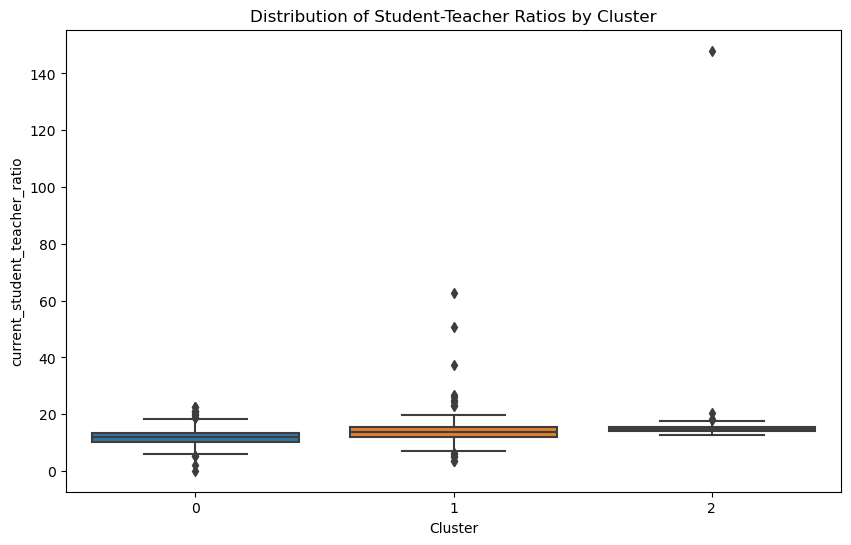

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting the distribution of 'current_student_teacher_ratio' for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='current_student_teacher_ratio', data=teachers20_21)
plt.title('Distribution of Student-Teacher Ratios by Cluster')
plt.show()


In [120]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score of the clustering
silhouette_avg = silhouette_score(teachers20_21[numeric_columns], teachers20_21['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.1529


A silhouette score of 0.1529 suggests that the clustering structure found by KMeans is weak and could potentially be improved. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Therefore, a score around 0.15 indicates that, on average, clusters are not very distinct, and there might be considerable overlap between them, or that objects within a cluster are not very similar to each other.

Trying DBSCAN Good for data with clusters of similar density.

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Assuming 'selected_features' and 'teachers20_21' are defined as before
X = teachers20_21[selected_features]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [127]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to your original DataFrame
teachers20_21['DBSCAN_Cluster'] = clusters

# Viewing the first few rows to verify clustering
print(teachers20_21[['DISTRICT NAME', 'current_student_teacher_ratio', 'DBSCAN_Cluster']].head())


   DISTRICT NAME  current_student_teacher_ratio  DBSCAN_Cluster
0     CAYUGA ISD                      12.291221              -1
1    ELKHART ISD                      10.962822              -1
2  FRANKSTON ISD                      10.845638              -1
3     NECHES ISD                      11.324503              -1
4  PALESTINE ISD                      12.908183              -1


In [128]:
# Analyzing clusters by counting the number of districts in each DBSCAN cluster

print(teachers20_21['DBSCAN_Cluster'].value_counts())

# Continuing with the example to analyze means by cluster, excluding outliers (cluster label -1)
# Assuming numeric_columns is a list of column names you want to include in the analysis
cluster_analysis = teachers20_21[teachers20_21['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[numeric_columns].mean()
print(cluster_analysis)






DBSCAN_Cluster
-1    1203
Name: count, dtype: int64
Empty DataFrame
Columns: [TOTAL NUMBER OF SCHOOLS, TOTAL STUDENTS, TOTAL STAFF FTE, TOTAL TEACHER FTE, STAFF: % TEACHERS, STAFF: % EDUCATIONAL AIDES, STAFF: % AUXILIARY, AVERAGE SALARY: TEACHER, NUMBER OF STUDENTS PER TOTAL STAFF, NUMBER OF STUDENTS PER TEACHER, TEACHER: % WITH 5 OR FEWER YEARS OF EXPERIENCE, TEACHER: AVERAGE YEARS OF EXPERIENCE, TEACHER: % WITH ADVANCED DEGREES, TEACHER: % AFRICAN AMERICAN, TEACHER: % HISPANIC, TEACHER: % WHITE, TEACHER: % AMERICAN INDIAN, TEACHER: % ASIAN, TEACHER: % PACIFIC ISLANDER, TEACHER: % TWO OR MORE RACES, TEACHER: % REGULAR EDUCATION, TEACHER: % SPECIAL EDUCATION, TEACHER: % COMPENSATORY EDUCATION, TEACHER: % BILINGUAL/ESL EDUCATION, TEACHER: % CAREER & TECHNICAL EDUCATION, TEACHER: % OTHER EDUCATION (INCLUDES G & T), current_student_teacher_ratio]
Index: []

[0 rows x 27 columns]


The output indicates that DBSCAN labeled all districts as outliers (-1), which suggests no distinct clusters were formed according to the density criteria set by the eps and min_samples parameters. This result is a common challenge with DBSCAN, especially when dealing with high-dimensional data or when the parameters are not optimally set for the data's distribution.

Finding Optimal eps Value Using the k-distance Graph
A k-distance graph plots the distance to the kth nearest neighbor for each point, sorted in ascending order. The idea is to find an "elbow" in the graph, which can be a good eps value.

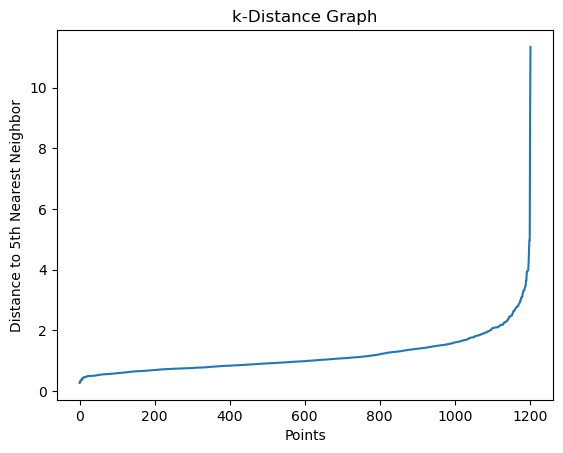

In [129]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('k-Distance Graph')
plt.show()


Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique that can be used to reduce the number of variables in your data by transforming them into a new set of variables, the principal components, which are orthogonal (uncorrelated) and capture the maximum variance in the data.

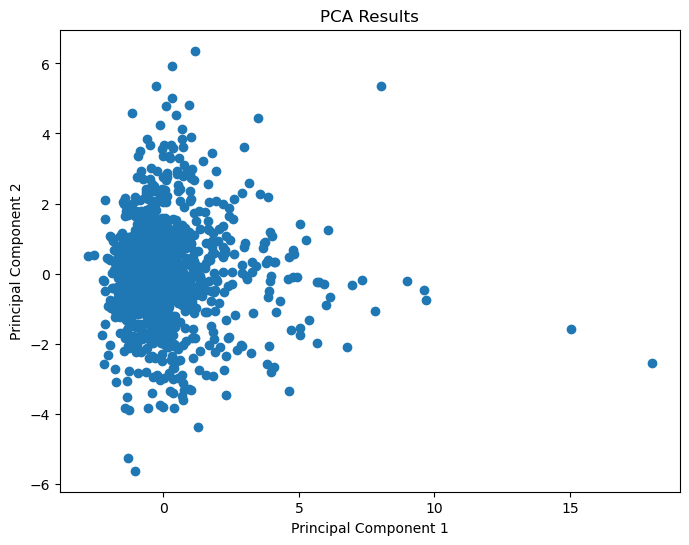

In [130]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume X_scaled is your scaled feature set
pca = PCA(n_components=2)  # Reduce data to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()


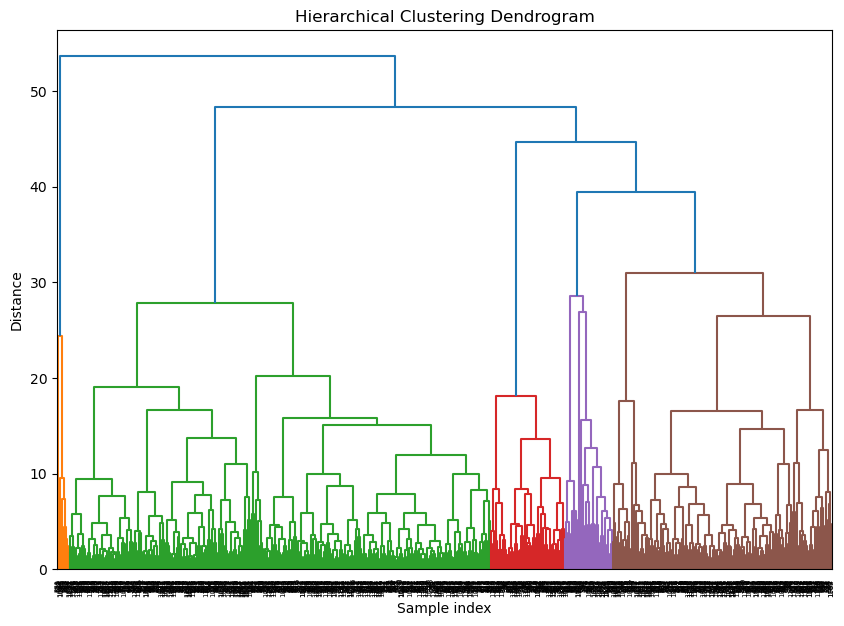

In [131]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


Hierarchical Clustering
Hierarchical clustering builds a hierarchy of clusters where each node is a cluster consisting of the clusters of its daughter nodes. Strategies for hierarchical clustering generally fall into two types:

Agglomerative: This is a "bottom-up" approach starting with each observation as a separate cluster and merging them into larger clusters.
Divisive: A "top-down" approach starting with all observations in one cluster and dividing it into smaller ones.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1203 samples in 0.003s...
[t-SNE] Computed neighbors for 1203 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1203
[t-SNE] Computed conditional probabilities for sample 1203 / 1203
[t-SNE] Mean sigma: 0.797735
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.357727
[t-SNE] KL divergence after 300 iterations: 1.648528


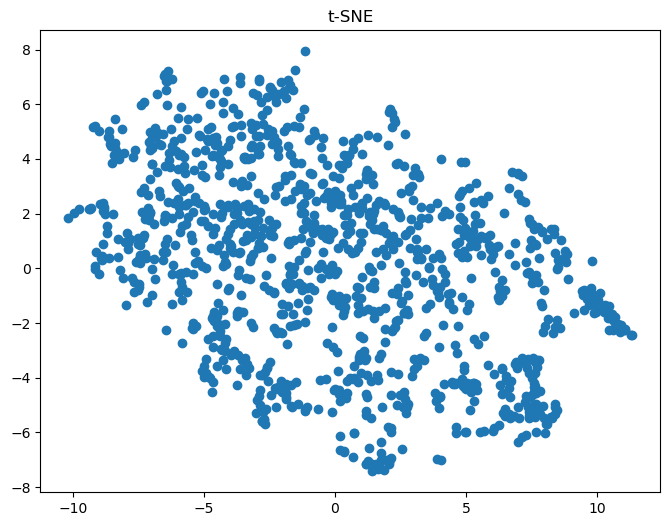

In [132]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE')
plt.show()
